In [2]:
import sys, os, torch
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

if(torch.cuda.device_count() >= 1):
    device = "cuda:0"
else:
    device = 'cpu'

# move directory
os.chdir("..")

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

,model,F1-score,AUC,Precision,Recall,Prediction-time
0,DilatedTCN,0.86,0.884,0.98,0.77,10.0ms
1,DilatedTCN,0.80,0.862,0.90,0.73,20.0ms
2,DilatedTCN,0.74,0.833,0.83,0.67,30.0ms
3,DilatedTCN,0.72,0.810,0.84,0.63,40.0ms
4,DilatedTCN,0.68,0.792,0.78,0.60,50.0ms
5,Bayesian-DilatedTCN,0.85,0.890,0.94,0.78,10.0ms
6,Bayesian-DilatedTCN,0.78,0.852,0.87,0.71,20.0ms
7,Bayesian-DilatedTCN,0.74,0.825,0.86,0.66,30.0ms
8,Bayesian-DilatedTCN,0.71,0.800,0.85,0.61,40.0ms
9,Bayesian-DilatedTCN,0.66,0.775,0.78,0.57,50.0ms


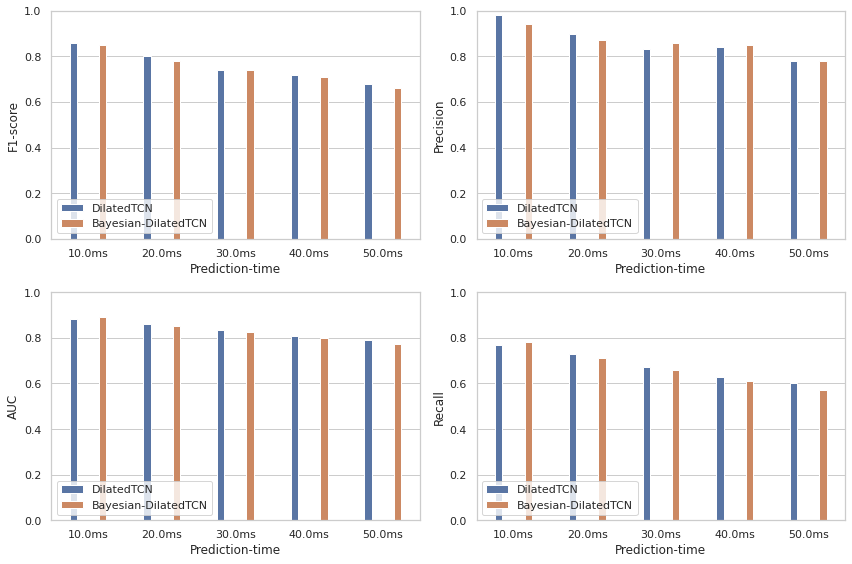

In [5]:
model_list = ['DilatedTCN']*5+['Bayesian-DilatedTCN']*5
dist_list = ["{:.1f}ms".format(10.0 * i) for i in [1,2,3,4,5]] * 2 
f1_list = [0.86, 0.80, 0.74, 0.72, 0.68] + [0.85, 0.78, 0.74, 0.71, 0.66]
auc_list = [0.884, 0.862, 0.833, 0.81, 0.792] + [0.89, 0.852, 0.825, 0.80, 0.775]
dis_pre_list = [0.98, 0.90, 0.83, 0.84, 0.78] + [0.94, 0.87, 0.86, 0.85, 0.78]
dis_rec_list = [0.77,0.73, 0.67, 0.63, 0.60] + [0.78, 0.71, 0.66, 0.61, 0.57]

df_exp_algorithm = pd.DataFrame({
    "model":model_list,
    "F1-score":f1_list,
    "AUC":auc_list,
    "Precision":dis_pre_list,
    "Recall":dis_rec_list,
    "Prediction-time":dist_list
})

fig, axes = plt.subplots(2,2, sharex = False, figsize = (12, 8))
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'F1-score', hue = 'model', ax = axes[0,0])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'AUC', hue = 'model', ax = axes[1,0])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Precision', hue = 'model', ax = axes[0,1])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Recall', hue = 'model', ax = axes[1,1])

sns.set_theme(style="whitegrid") ## figure, axes 스타일
width = 0.1

for i in range(0,4):
    for bar in axes.ravel()[i].patches:
        x = bar.get_x() # 막대 좌측 하단 x 좌표
        old_width = bar.get_width() # 기존 막대 폭
        bar.set_width(width) # 폭변경
        bar.set_x(x+(old_width-width)/2) # 막대 좌측 하단 x 좌표 업데이트
        
    axes.ravel()[i].legend(loc='lower left')
    axes.ravel()[i].set_ylim([0,1.0])
    
fig.tight_layout()

df_exp_algorithm.groupby(by="model").apply(lambda x : x[:])

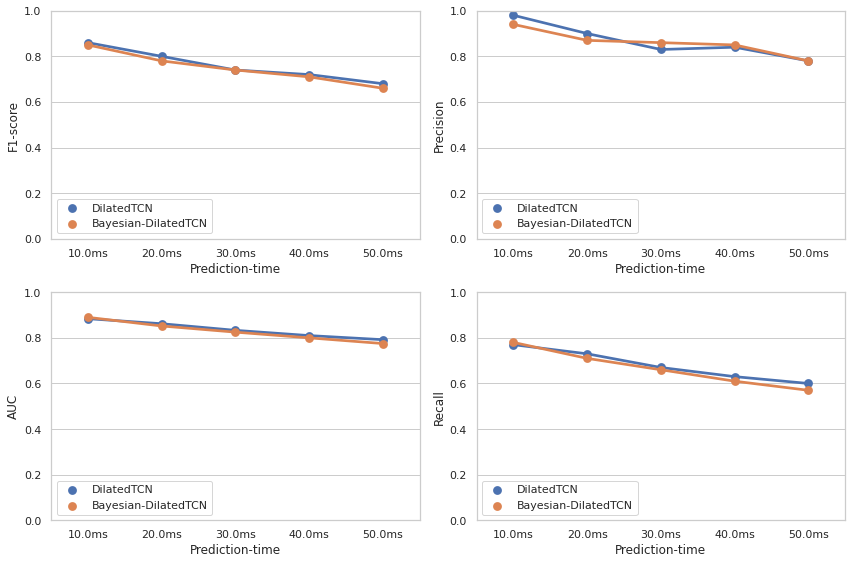

In [6]:
fig, axes = plt.subplots(2,2, sharex = False, figsize = (12, 8))
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'F1-score', hue = 'model', ax = axes[0,0])
axes[0,0].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'AUC', hue = 'model', ax = axes[1,0])
axes[1,0].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Precision', hue = 'model', ax = axes[0,1], )
axes[0,1].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Recall', hue = 'model', ax = axes[1,1])
axes[1,1].legend(loc='lower left')

axes[0,0].set_ylim([0,1.0])
axes[1,0].set_ylim([0,1.0])
axes[0,1].set_ylim([0,1.0])
axes[1,1].set_ylim([0,1.0])
fig.tight_layout()